## Domanda Teorica

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi ri regressione standard, fornendo esempi ed applicazioni/limiti.

Le time series forecasting sono metodi di analisi usati per prevedere il valore futuro di una variabile dopo aver analizzato i suoi valori passati, per questo sono in grado di prevedere il comportamento di una variabile nel tempo e di identificare trend, stagionalità e ciclicità.
Le loro differenze dai problemi di regressione standard consistono nella organizzazione in ordine cronologico dei loro dati e che il loro obbiettivo è di prevedere valori futuri basandosi sui valori passati, inoltre le time series foreasting hanno bisogno di aver già indicati i modelli di ciclicità dei dati,tendenza e stagionalità.

## Fake news Detection

In [60]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [61]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [62]:
df_fake = pd.read_csv(path_fake)
df_true = pd.read_csv(path_true)
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,SEATTLE/SAN FRANCISCO (Reuters) - A U.S. appea...,1
1,NEW YORK (Reuters) - A federal judge blocked t...,1
2,It s been about seven years since minimum wage...,0
3,CAIRO (Reuters) - An Egyptian lawmaker is intr...,1
4,A Target employee in Indiana has just gone vir...,0
...,...,...
44893,WASHINGTON (Reuters) - U.S. Defense Secretary ...,1
44894,Judge Napolitano spoke out today about the un...,0
44895,Wild Bill For America is a conservative Youtub...,0
44896,Miracle Mattress of San Antonio wants everyone...,0


In [63]:
patterns = {
            r'\d+': '',      # rimuove digits (numeri)
            r'[^\w\s]': '',  # Remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',#remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '      # rimuove tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

In [64]:
df_fake = clean_column(df_fake,'text',patterns)
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn wish all americans ha...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,friday was revealed that former milwaukee she...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced that wou...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,century wire says wire reported earlier this ...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,century wire says familiar theme whenever the...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,patrick henningsen century wireremember when t...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,century wire says jazeera america will down h...,Middle-east,"January 14, 2016",0


In [65]:
text_fake = list(map(str, df_fake['text']))
text_fake = ''.join(text_fake)

(-0.5, 799.5, 399.5, -0.5)

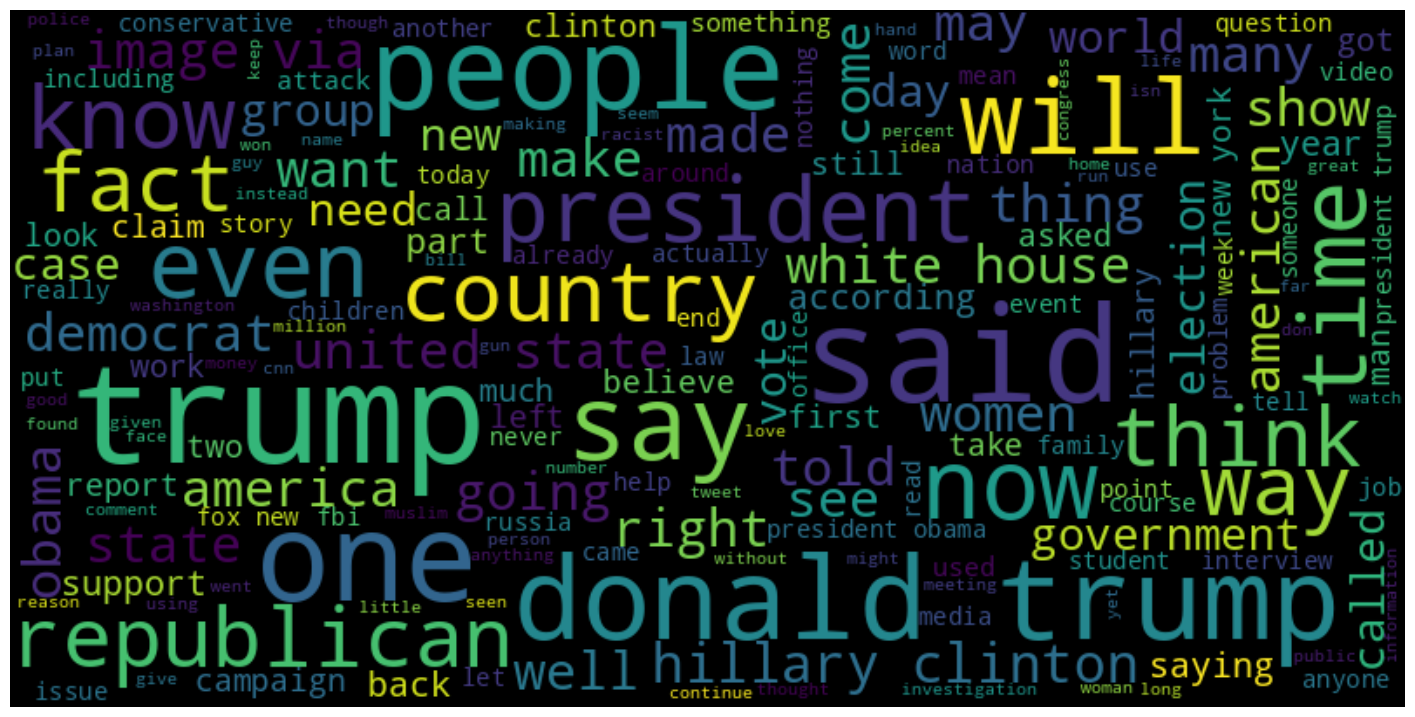

In [66]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_fake)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [67]:
df_true = clean_column(df_true,'text',patterns)
df_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head conservative repub...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people will all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel investi...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies tuesday welcomed ...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,minsk reuters the shadow disused sovietera fac...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,"August 22, 2017",1


In [68]:
text_true = list(map(str, df_true['text']))
text_true = ''.join(text_true)

(-0.5, 799.5, 399.5, -0.5)

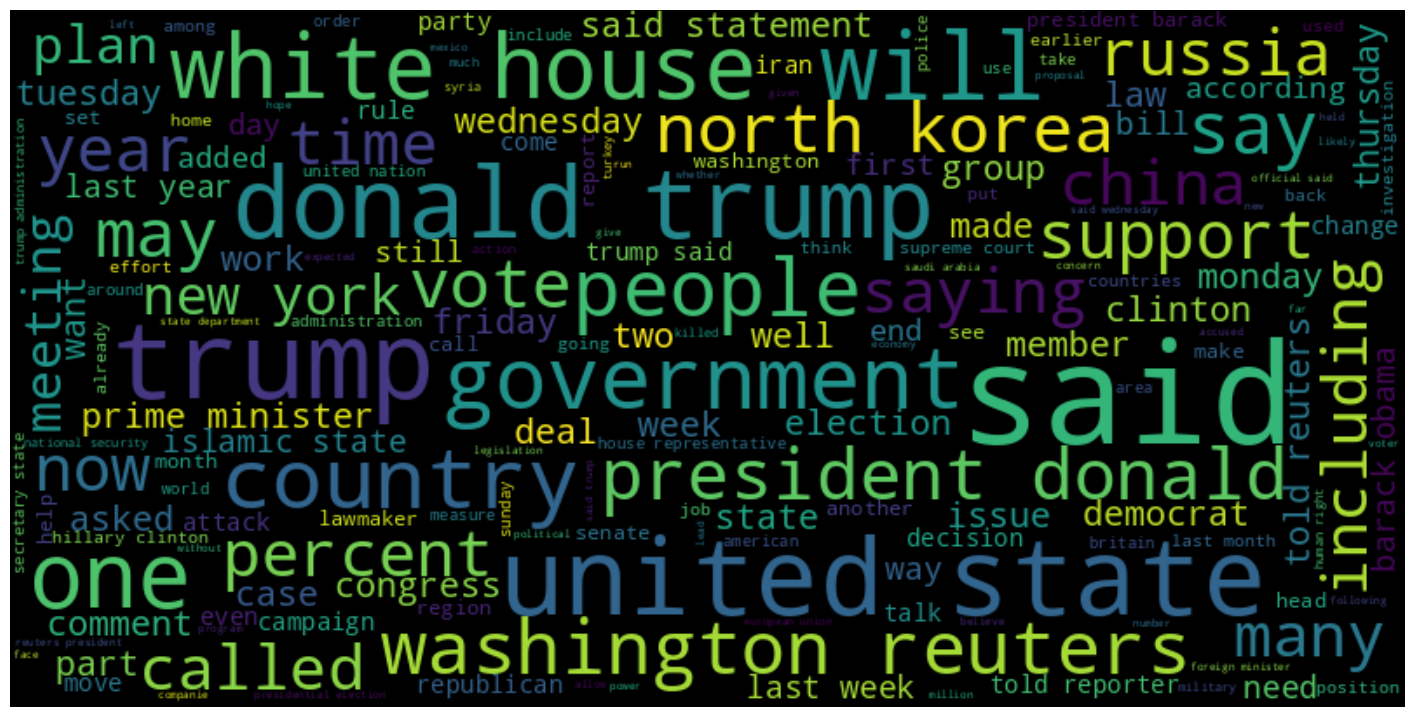

In [69]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_true)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [70]:
df = clean_column(df, 'text', patterns)
df

,text,class
0,seattlesan francisco reuters appeals court wed...,1
1,new york reuters federal judge blocked the dep...,1
2,been about seven years since minimum wage emp...,0
3,cairo reuters egyptian lawmaker introducing dr...,1
4,target employee indiana has just gone viral f...,0
...,...,...
44893,washington reuters defense secretary ash carte...,1
44894,judge napolitano spoke out today about the unm...,0
44895,wild bill for america conservative youtube sen...,0
44896,miracle mattress san antonio wants everyone kn...,0


In [71]:
df['class'].value_counts()

0    23481
1    21417
Name: class, dtype: int64

In [72]:
text = list(map(str, df['text']))
text = ''.join(text)
text

(-0.5, 799.5, 399.5, -0.5)

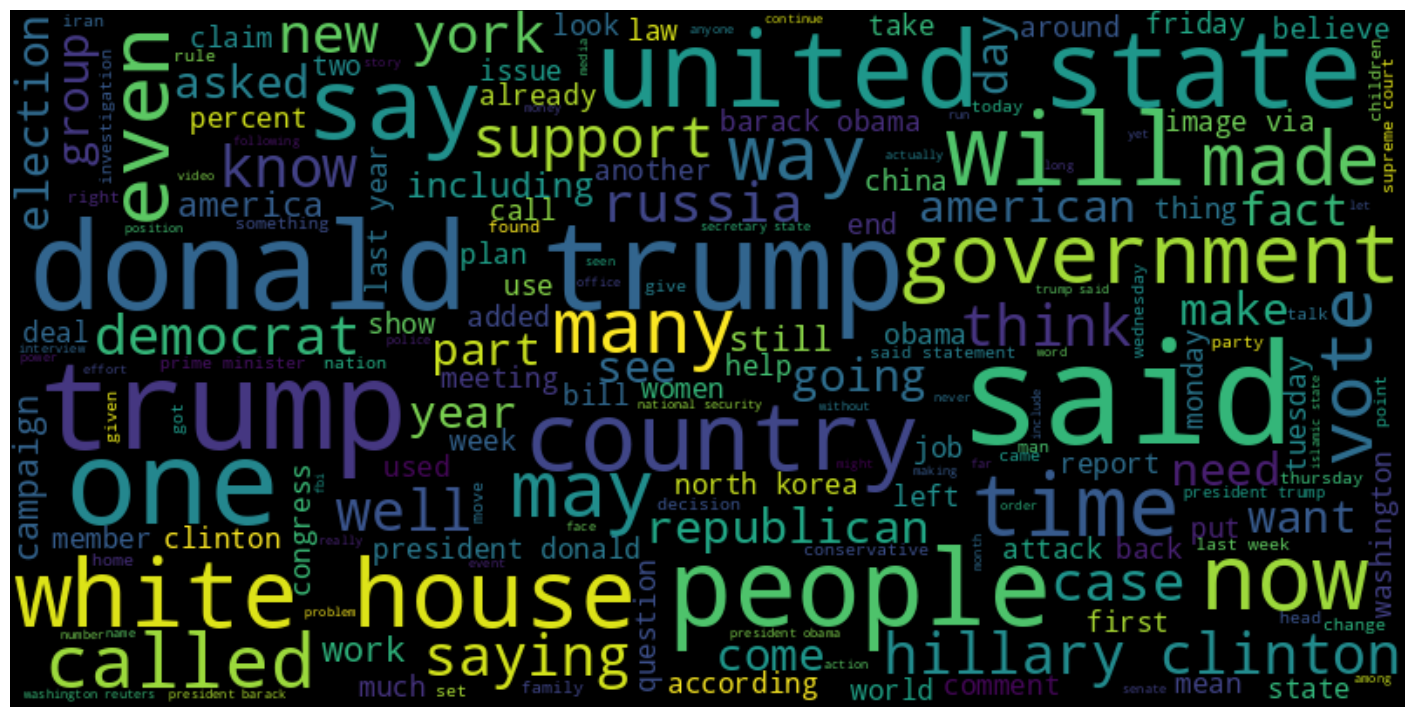

In [86]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [87]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [88]:
X = df['text']
y = df['class']

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
#vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 2, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 8, 0, 0],
       ...,
       [0, 0, 0, ..., 7, 0, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.05661095, 0.        ,
        0.        ],
       [0.        , 0.04466414, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.19180317, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.31309219, 0.        ,
        0.13351601],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9853006681514477

In [93]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9344469190794358

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7030
           1       0.92      0.94      0.93      6440

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



Text(95.72222222222221, 0.5, 'Actual')

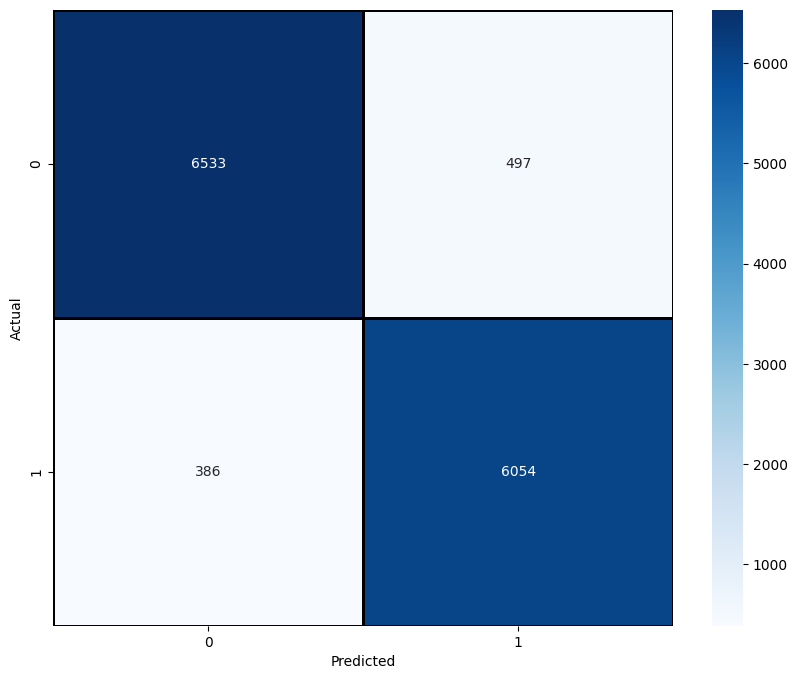

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf = MultinomialNB(alpha=0.1)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9346696362286563


In [97]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7030
           1       0.92      0.94      0.93      6440

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



Text(95.72222222222221, 0.5, 'Actual')

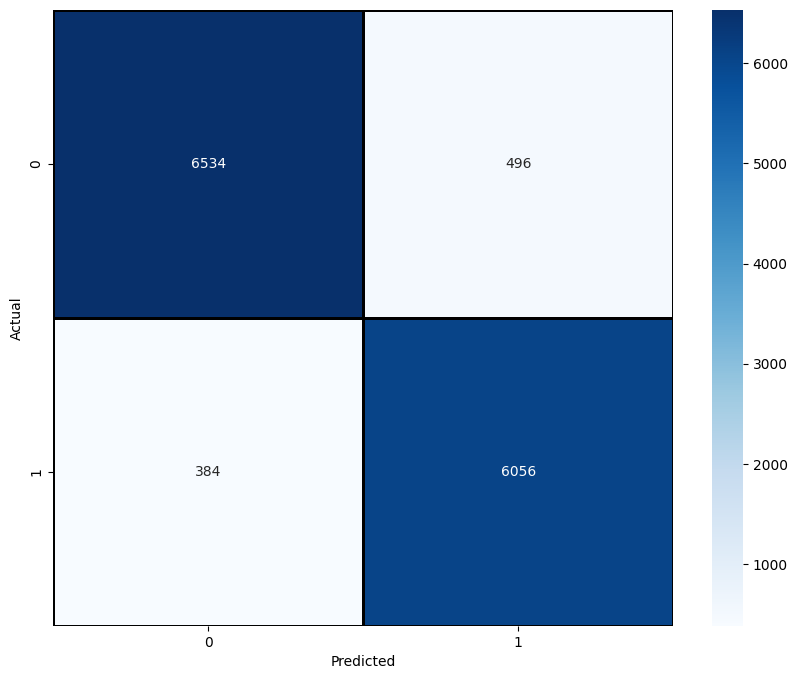

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [100]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.92624265 0.93461607 0.93228795 0.93763364 0.93709907 0.93442623
 0.92872416 0.93246614]
mean=0.9329369908517279
std=0.0036678273044124733


In [101]:
import joblib
joblib.dump(pipe,'esameDMLucaBettini.pkl')

['esameDMLucaBettini.pkl']

In [102]:
import joblib

uploaded_model = joblib.load('esameDMLucaBettini.pkl')
pred = uploaded_model.predict(['Trump']) #
pred[0]

0